In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/spotify_churn_dataset.csv')

In [ ]:
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


In [ ]:
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [ ]:
df.isnull().sum()

,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


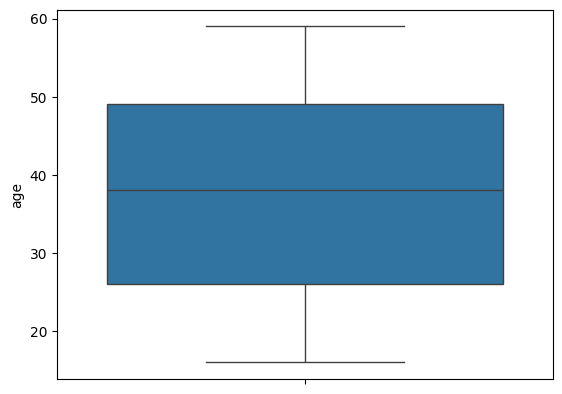

In [ ]:
sns.boxplot(df['age'])
plt.show()

In [ ]:
df.gender.unique()

array(['Female', 'Other', 'Male'], dtype=object)

In [93]:
df.drop_duplicates(inplace=True)

# Column Rename

In [ ]:
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


In [ ]:
change_countryname={
  'AU': 'Australia',
  'CA': 'Canada',
  'US': 'United States',
  'IN': 'India',
  'DE': 'Germany',
  'UK': 'United Kingdom',
  'PK': 'Pakistan',
  'FR': 'France'
}
change_countryname

{'AU': 'Australia',
 'CA': 'Canada',
 'US': 'United States',
 'IN': 'India',
 'DE': 'Germany',
 'UK': 'United Kingdom',
 'PK': 'Pakistan',
 'FR': 'France'}

In [ ]:
df['country']=df['country'].map(change_countryname).fillna(df['country'])

# **Country Wise Subscription**

In [ ]:
country_wise_subs = df.groupby('country')['gender'].count().sort_values(ascending=False)

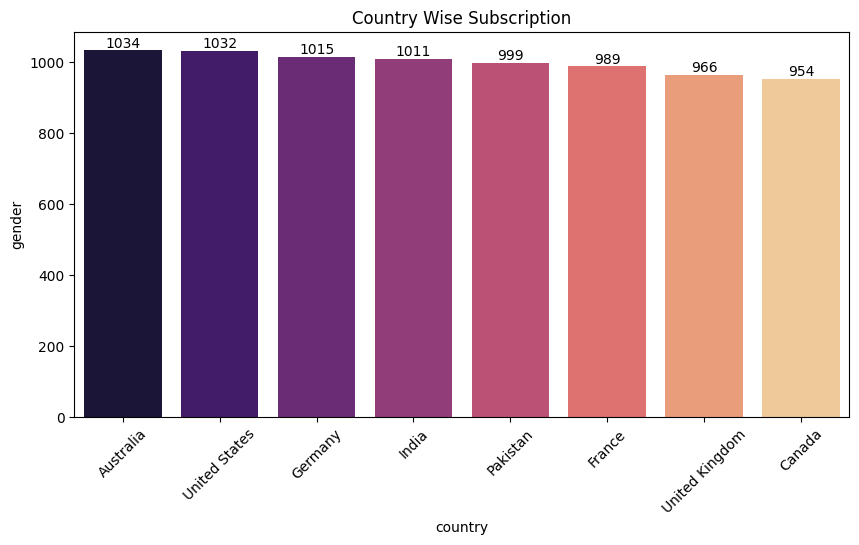

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(country_wise_subs,palette='magma')
for container in ax.containers:
    plt.bar_label(container)
plt.title("Country Wise Subscription")
plt.xticks(rotation=45)
plt.show()

# **Gender Wise Subscription**

In [ ]:
df.groupby("subscription_type")["gender"].count()

,gender
subscription_type,
Family,1908
Free,2018
Premium,2115
Student,1959


In [ ]:
sub_group=df.groupby(['subscription_type','gender'])['gender'].count()
sub_group

subscription_type  gender
Family             Female    604
                   Male      657
                   Other     647
Free               Female    687
                   Male      659
                   Other     672
Premium            Female    701
                   Male      725
                   Other     689
Student            Female    667
                   Male      650
                   Other     642
Name: gender, dtype: int64

In [ ]:
pivot = sub_group.unstack(level="gender")
pivot

gender,Female,Male,Other
subscription_type,,,
Family,604,657,647
Free,687,659,672
Premium,701,725,689
Student,667,650,642


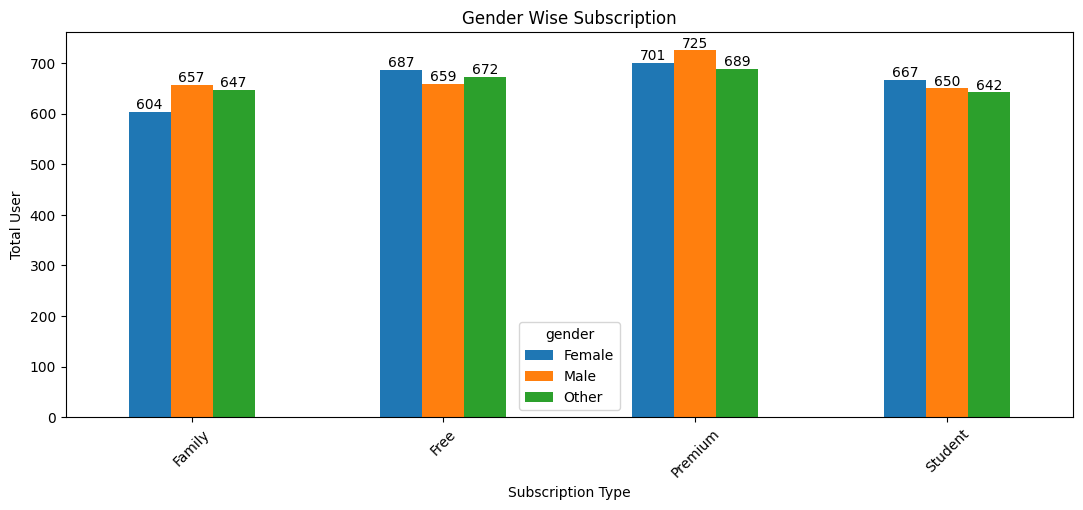

In [ ]:
ax = pivot.plot(kind="bar", figsize=(13,5))
plt.title("Gender Wise Subscription")
plt.xlabel("Subscription Type")
plt.ylabel("Total User")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Across all subscription types—Family, Free, Premium, and Student—the number of users is fairly balanced across genders, with no major gaps. Male users tend to have slightly higher counts in most categories, particularly in the Premium and Family plans, while Female users show strong representation in the Free and Student plans. “Other” gender users also follow a similar pattern with consistently steady counts. Overall, subscription preferences appear broadly similar across genders, with only small variations.

## **How does subscription type affect listening behavior?**

Compare average listening time

Compare songs played per day

Compare skip rate


 **Compare average listening time**

In [ ]:
df.groupby('subscription_type')['listening_time'].mean().round(2)

,listening_time
subscription_type,
Family,151.04
Free,155.00
Premium,155.52
Student,154.49


**Compare songs played per day**

In [ ]:
df.groupby('subscription_type')["songs_played_per_day"].mean()

,songs_played_per_day
subscription_type,
Family,50.383124
Free,49.204163
Premium,49.744681
Student,51.241960


**Compare skip rate**

In [ ]:
df.groupby('subscription_type')["skip_rate"].median()

,skip_rate
subscription_type,
Family,0.30
Free,0.30
Premium,0.29
Student,0.30


## **What is the relationship between skip rate and listening engagement?**

**Do users who skip more listen less?**

In [ ]:
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,Canada,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,Germany,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,Australia,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,Canada,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,United States,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,Germany,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,Australia,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,United States,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,India,Student,245,94,0.27,Desktop,0,1,0


In [ ]:
data1=df[['listening_time','skip_rate']]

In [ ]:
rel = data1.corr()
rel

,listening_time,skip_rate
listening_time,1.000000,-0.013603
skip_rate,-0.013603,1.000000


<Axes: >

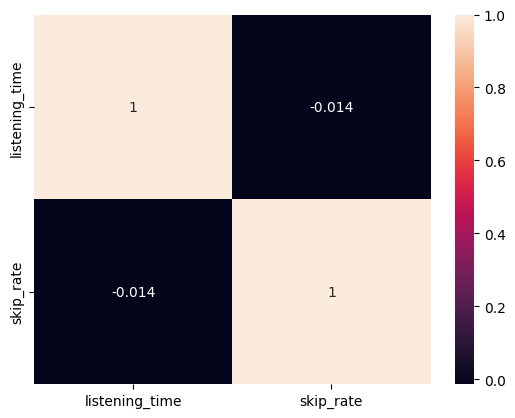

In [ ]:
sns.heatmap(rel,annot=True)

**Do users who skip more listen less**

In [ ]:
df.groupby("subscription_type")[['skip_rate','listening_time']].mean().round(2)

,skip_rate,listening_time
subscription_type,,
Family,0.3,151.04
Free,0.3,155.00
Premium,0.3,155.52
Student,0.3,154.49


## **Which device type is associated with the highest usage?**

# **Mobile vs Desktop vs Web.**

In [ ]:
highest_usage = df['device_type'].value_counts()
highest_usage

,count
device_type,
Desktop,2778
Web,2623
Mobile,2599


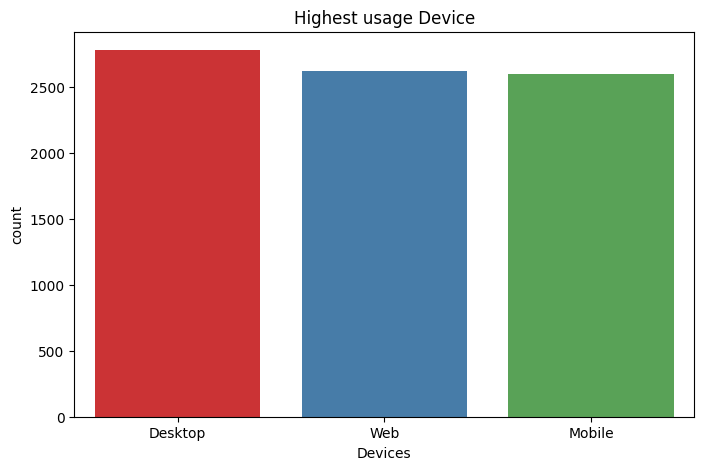

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(highest_usage,palette="Set1")
plt.title("Highest usage Device")
plt.xlabel("Devices")
plt.show()

Desktop users show the highest overall usage (2,778), slightly exceeding Web (2,623) and Mobile (2,599). Although all three device types have similar usage levels, Desktop leads by a small margin, suggesting users may engage more deeply or for longer sessions when using desktop devices compared to mobile or web platforms.

## **Are premium-based users more engaged than free users?**

In [ ]:
premium_based = df.groupby('subscription_type')['listening_time'].mean().round(2)
premium_based

,listening_time
subscription_type,
Family,151.04
Free,155.00
Premium,155.52
Student,154.49


Premium users show only a slight increase in listening time (155.52) compared to Free users (155.00), indicating that Premium users are marginally more engaged. However, the difference is very small, and listening times across all subscription types (Family, Free, Premium, Student) are nearly the same. This suggests that subscription type does not strongly influence overall listening time.

# **Highest User Rate (by Gender)**

In [ ]:
df3 = df['gender'].value_counts().round(2)
df3

,count
gender,
Male,2691
Female,2659
Other,2650


In [ ]:
per = (df3.values/8000*100).round(2)
per

array([33.64, 33.24, 33.12])

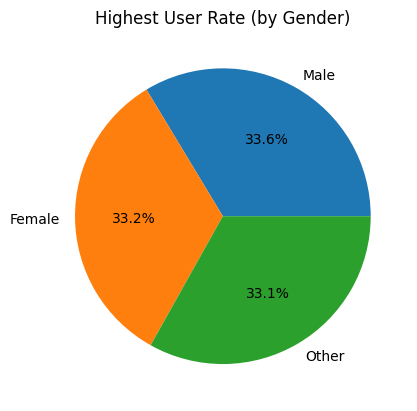

In [ ]:
plt.pie(per,autopct="%1.1f%%",labels=df3.index)
plt.title("Highest User Rate (by Gender)")
plt.show()

Male users have the highest usage rate at 33.6%, followed closely by female users at 33.2% and other genders at 33.1%. The differences between the groups are minimal, indicating that usage is fairly evenly distributed across all genders.

## **Does churn relate to listening activity?**

**Do churned users have lower listening time?**

**Higher skip rates?**

**Fewer songs per day?**

## **Does churn relate to listening activity**

In [ ]:

df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,Canada,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,Germany,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,Australia,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,Canada,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,United States,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,Germany,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,Australia,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,United States,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,India,Student,245,94,0.27,Desktop,0,1,0


In [ ]:
df[(df['is_churned'] == 1)]

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,Canada,Free,26,23,0.20,Desktop,31,0,1
2,3,Male,38,Australia,Premium,199,38,0.04,Mobile,0,1,1
4,5,Other,29,United States,Family,250,57,0.36,Mobile,0,1,1
11,12,Other,24,Canada,Free,113,24,0.56,Desktop,39,0,1
14,15,Other,37,India,Family,114,13,0.44,Web,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7981,7982,Female,44,France,Family,253,41,0.33,Desktop,0,1,1
7982,7983,Male,57,Australia,Premium,176,77,0.43,Web,0,1,1
7984,7985,Other,16,Pakistan,Premium,277,76,0.02,Desktop,0,1,1
7988,7989,Male,41,India,Student,137,74,0.53,Desktop,0,1,1


In [ ]:
df[(df['is_churned'] == 1)].count()

,0
user_id,2071
gender,2071
age,2071
country,2071
subscription_type,2071
listening_time,2071
songs_played_per_day,2071
skip_rate,2071
device_type,2071
ads_listened_per_week,2071


## **Compare listening time**
Look at their average listening time.

Then look at the average listening time of non-churned users.

Compare both to see who listens more.

In [ ]:
avg_lis_chur=df.loc[(df['is_churned'] == 1),"listening_time"]
avg_lis_chur

,listening_time
0,26
2,199
4,250
11,113
14,114
...,...
7981,253
7982,176
7984,277
7988,137


In [ ]:
avg_lis_chur.mean().round(2)

np.float64(152.98)

In [ ]:
avg_lis_nonchur=df.loc[(df['is_churned'] == 0),"listening_time"]
avg_lis_nonchur

,listening_time
1,141
3,36
5,219
6,289
7,210
...,...
7994,21
7996,61
7997,81
7998,245


In [ ]:
avg_lis_nonchur.mean().round(2)

np.float64(154.45)

## **Higher skip rates?**

What is the average skip rate for churned users?

What is the average skip rate for active (non-churned) users?

In [ ]:
avg_skip_chur=df.loc[(df['is_churned'] == 1),"skip_rate"]
avg_skip_chur

,skip_rate
0,0.20
2,0.04
4,0.36
11,0.56
14,0.44
...,...
7981,0.33
7982,0.43
7984,0.02
7988,0.53


In [ ]:
avg_skip_chur.mean().round(2)

np.float64(0.3)

In [ ]:
avg_skip_nonchur=df.loc[(df['is_churned'] == 0),"skip_rate"]
avg_skip_nonchur.mean()

np.float64(0.29847360431776015)

In [90]:
avg_skip_chur.mean().round(2)
print("Avg skip rate (Churned):", avg_skip_chur.mean().round(2))

Avg skip rate (Churned): 0.3


In [92]:
avg_skip_nonchur.mean().round(3)
print("Avg skip rate (NOn-Churned):", avg_skip_nonchur.mean().round(3))

Avg skip rate (NOn-Churned): 0.298


## **Compare songs played per day**
How many songs per day churned users play

How many songs per day non-churned users play

In [ ]:
avg_song_play_chur=df.loc[(df['is_churned'] == 1),"songs_played_per_day"]
avg_song_play_chur

,songs_played_per_day
0,23
2,38
4,57
11,24
14,13
...,...
7981,41
7982,77
7984,76
7988,74


In [ ]:
avg_song_play_chur.mean().round(2)

np.float64(50.58)

In [ ]:
avg_song_play_nonchur=df.loc[(df['is_churned'] == 0),"songs_played_per_day"]
avg_song_play_nonchur

,songs_played_per_day
1,62
3,2
5,35
6,44
7,68
...,...
7994,77
7996,64
7997,62
7998,94


In [ ]:
avg_churn_user = avg_song_play_chur.mean().round(2)
print("Avg songs per day (Churned):", avg_churn_user)

Avg songs per day (Churned): 50.58


In [ ]:
avg_churn_nonuser = avg_song_play_nonchur.mean().round(2)
print("Avg songs per day (Non-Churned):", avg_churn_nonuser)

Avg songs per day (Non-Churned): 49.97
